# Data mining with Twitter API and Basic NLP - Lab 

## Introduction
In this lab, we shall use our Twitter developer account created in the previous lessson and the keys we generated to make some API calls to twitter. We shall look at a number of ways of accessing twitter data which may suit different use cases for twitter API calling. We shall also get an introduction to the `tweepy` Python library to help us with tweet mining and parsing. We shall perform some basic NLP to count the term frequencies etc.

**Note:** You are encourages to consult the Twitter API documentation and `tweepy` library documentation to understand structure of tweets and their properties for accessing specific elements. 


## Objectives

You will be able to:
* Successfully request tweet data from the Twitter API using the Tweepy library
* Understand the structure of Twitter JSON object structure
* Parse tweet data and perform basic text analysis using basic NLP techniques
* Visualize hashtags, mentions from tweets using number of visualization techniques
* Collect and Parse tweets for a number of use cases

## `tweepy`

Tweepy is open-source library, hosted on GitHub and enables Python to communicate with Twitter platform and use its API. Remember , we can access Twitter API and access tweets even without this library. Tweepy makes the whole process simple and easy to understand and execute. Visit [HERE](https://pythonhosted.org/tweepy/index.html) for Tweepy's official documentation and a full list of offered features. 

Installing tweepy is easy, it can be pip installed as shown below:

In [2]:
# uncomment and pip install tweepy if you havent done so already
# !pip install tweepy
# !pip install nltk

We can now simply import import tweepy in the python working environment

In [29]:
import tweepy

import nltk
import operator 
import json
from collections import Counter
import pandas as pd
from nltk import bigrams

from pprint import pprint

import matplotlib.pyplot as plt
plt.style.use('seaborn')


In [30]:
# nltk.download('stopwords')  # to download stop-words list


So we are now good to move on with setting up tweepy with our user and access tokens. 

### Using tweepy
Tweepy supports accessing Twitter through OAuth. Twitter has stopped accepting Basic Authentication so OAuth is now the only way to use the Twitter API. In order to create the API object, however, we must first authenticate ourselves with our developer information.
* Enter your credentials into access_token, access_token_secret, consumer_key, and consumer_secret below

In [6]:
# Set credential variables with appropriate string values
consumer_key = '6Ltj74S32BKcYgHSvPzH9XeYB'
consumer_secret = 'RqPub8THs36k2YOjGVFlNpb8jYoICG2ScHPoygshTGwql5Zcqq'
access_token = '836788706707034112-GzNkz3odinKraSvvFAT0Bg7EdPiy8Qk'
access_token_secret = 'oAF6BwvPnJl5ae6dKnuk0sdJgXGsusdMuJl61IndTQMGl'

### Create the Authentication Object

Our next step would be to create tweepy  OAuthHandler instance with our consumer key and secret and set access token and secret using `tweepy.set_access_token`. We can then create an API object with this information.

We shall set it up as shown below:

```python
# Create the tweepy authentication object with consumer key and secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
my_first_api = tweepy.API(auth)
```

In [7]:
# Paste above code here with your credentials to create the Oauth Handler Instance and API object

# Create the tweepy authentication object with consumer key and secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)

# Creating the API object while passing in auth information
my_first_api = tweepy.API(auth)


If the above cell executed without any error.. congratulations. You can now start mining the Twitter API through `my_first_api` object. 

NOTE: If you have a web application and are using a callback URL that needs to be supplied dynamically, you would pass it in like shown below:
```python
auth = tweepy.OAuthHandler(consumer_token, consumer_secret, callback_url)
```

## Collecting Tweets From Own Timeline - `home_timeline()` method
A detailed indsight into Tweepy's API object with supported methods to post, retrieve and select tweets can be found at [Tweepy's API Dcoumentation](https://pythonhosted.org/tweepy/api.html#api-reference). It is strongly recommended for you to visit the documentation and study all the relevant methods and arguments that they take. 

We can directly collect tweets from our home timeline by applying the method `api.home_timeline()`, which collects 20 most recent tweets by default (including retweeted tweets). To adjust the desired number of tweets (take 100 tweets for example),  we can pass in a parameter value as (count = 100).

By default we get first 140 characters of a tweet. We can, however, optionally pass in an extra argument `tweet_mode='extended'` to get the full length of the tweet. This might be useful if you are interested in analyzing the full text of tweets rather than geographical locations, and hashtags etc. only. 

Perform the following 
* See how to get extended tweets [Here](https://github.com/sferik/twitter/issues/880). Use the API object to get tweets from your timeline ,collect 500 tweets.  
* Save the results into `my_timeline_tweets`. 

In [8]:
# Store the tweets it in a variable called my_timeline_tweets

my_timeline_tweets = my_first_api.home_timeline()
my_timeline_tweets

[Status(_api=<tweepy.api.API object at 0x1a20b9fe80>, _json={'created_at': 'Sun Jan 06 18:28:41 +0000 2019', 'id': 1081980892099170304, 'id_str': '1081980892099170304', 'text': 'When Slack goes down, you hear about it A LOT. But it’s less frequent than you think. These are the platforms who s… https://t.co/uCq8ZqYcsl', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/uCq8ZqYcsl', 'expanded_url': 'https://twitter.com/i/web/status/1081980892099170304', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': 1081980889574236161, 'in_reply_to_status_id_str': '1081980889574236161', 'in_reply_to_user_id': 1344951, 'in_reply_to_user_id_str': '1344951', 'in_reply_to_screen_name': 'WIRED', 'user': {'id': 1344951, 'id_str': '1344951', 'name': 'WIRED', 'screen_name': 'WIRED', 'location': 'San Francisco/New York',

### Tweet JSON

All Twitter APIs that return Tweets provide that data encoded using JavaScript Object Notation (JSON). Here is a summary of information you may find in a typical Tweet JASON. 

* Each Tweet has an **author**, a **message**, a **unique ID**, a **timestamp** of when it was posted. 
* Some tweets contain **geo metadata** shared by the user. 
* Each User has a Twitter **name**, an **ID**, a **number of followers**, and most often an account **bio**.
* With each Tweet we also get **"entity"** objects, which are arrays of common Tweet contents such as **hashtags**, **mentions**, **media**, and **links**. 
* If there are links, the JSON payload can also provide metadata such as the fully unwound **URL** and the webpage’s **title** and **description**.

You may not need all this information for every experiment, but its a good idea to have a general understanding of what data we receive as the result of our API call. 

Here is what a Tweet JSON structure looks like:

---

```pythpn
{
  "created_at": "Thu Apr 06 15:24:15 +0000 2017",
  "id_str": "850006245121695744",
  "text": "1\/ Today we\u2019re sharing our vision for the future of the Twitter API platform!\nhttps:\/\/t.co\/XweGngmxlP",
  "user": {
    "id": 2244994945,
    "name": "Twitter Dev",
    "screen_name": "TwitterDev",
    "location": "Internet",
    "url": "https:\/\/dev.twitter.com\/",
    "description": "Your official source for Twitter Platform news, updates & events. Need technical help? Visit https:\/\/twittercommunity.com\/ \u2328\ufe0f #TapIntoTwitter"
  },
  "place": {   
  },
  "entities": {
    "hashtags": [      
    ],
    "urls": [
      {
        "url": "https:\/\/t.co\/XweGngmxlP",
        "unwound": {
          "url": "https:\/\/cards.twitter.com\/cards\/18ce53wgo4h\/3xo1c",
          "title": "Building the Future of the Twitter API Platform"
        }
      }
    ],
    "user_mentions": [     
    ]
  }
}



```

---

## Parsing Tweet JSON

Let's try to print a single tweet to see what it looks like

In [9]:
# Unomment below to view contents of the tweet
my_timeline_tweets[0]

Status(_api=<tweepy.api.API object at 0x1a20b9fe80>, _json={'created_at': 'Sun Jan 06 18:28:41 +0000 2019', 'id': 1081980892099170304, 'id_str': '1081980892099170304', 'text': 'When Slack goes down, you hear about it A LOT. But it’s less frequent than you think. These are the platforms who s… https://t.co/uCq8ZqYcsl', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/uCq8ZqYcsl', 'expanded_url': 'https://twitter.com/i/web/status/1081980892099170304', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': 1081980889574236161, 'in_reply_to_status_id_str': '1081980889574236161', 'in_reply_to_user_id': 1344951, 'in_reply_to_user_id_str': '1344951', 'in_reply_to_screen_name': 'WIRED', 'user': {'id': 1344951, 'id_str': '1344951', 'name': 'WIRED', 'screen_name': 'WIRED', 'location': 'San Francisco/New York', 

So the Tweet here is in the JSON format , which we can parse as dictionaries. 

We can iterate through collected tweets in `my_timeline_tweets` to access any of the properties of each tweet. Let's print the name and location of users with `.user.name`, `.user.locations` propoerties, and content of the each tweet using the `.text` property. 

**NOTE:** Use `.full_text` in case of using `tweet_mode='extended'` OR just `.text` if you havent passed in the extended argument. 

#### Iterate through `my_timeline_tweets` and print the usernames, location and text of the each collected tweet. 

In [10]:
# Iterate through my_timeline_tweets and print the name, location and text for each tweet using k:v pairs addressing

for tweet in my_timeline_tweets:
    print(tweet.user.name)
    print(tweet.user.location)
    print(tweet.text)
    print('---------------------------------------')





# EXAMPLE OUTPUT
    
# Dr. Data&Science 🎃
# SFO | ATL | 🛫
# RT @RalstonReports: The turnout models are looking better for Democrats in Nevada as they boost their statewide lead a bit, but long way to…
# ----------------------------------------------------------------------------
# Data Science Central
# Seattle, WA
# [Cheat Sheet] Python Basics For Data Science https://t.co/fH07ZFF9zw
# ----------------------------------------------------------------------------
# Dr. Data&Science 🎃
# SFO | ATL | 🛫
# RT @Popehat: NYT:  Well, Okay, But Are People Mean To Trump?
# Everyone: Can you not
# NYT:  Jazz: What If Black People Got Involved In Jazz
# Ev…
# .
# .
# .
# .
# IBM Data Science
# San Francisco, CA
# Essential math for data science: A curated list including functions, variables, equations, graphs, statistics, linear algebra, calculus, discrete math, optimization, and operation research topics, whew. Check it out here: https://t.co/0JtcPuJ04N via @kdnuggets #datascience https://t.co/E2m2trORG9
# ----------------------------------------------------------------------------
# Data Science Central
# Los Angeles, CA
# The Mathematics of Machine Learning https://t.co/GUBZVT8NUj

WIRED
San Francisco/New York
When Slack goes down, you hear about it A LOT. But it’s less frequent than you think. These are the platforms who s… https://t.co/uCq8ZqYcsl
---------------------------------------
WIRED
San Francisco/New York
There’s nothing like a Slack outage to shake up the internet. When it went offline for more than three hours on Jun… https://t.co/zDe9cJnHeu
---------------------------------------
WIRED
San Francisco/New York
Google and its sister services, like Google Docs and Gmail, rarely crash. But on August 16, 2013, the site went dow… https://t.co/zQo4f5X8PF
---------------------------------------
WIRED
San Francisco/New York
Porhub also reaped the rewards of a server issue that caused Fortnite to go down on April 11, 2018. Google Analytic… https://t.co/zkjI5ME4Fy
---------------------------------------
WIRED
San Francisco/New York
News sites aren’t the only ones who benefited when YouTube went down this fall. Traffic to the porn site Pornhub su… https://t.co/i

Thats is great. We are getting some meaningful information indeed. 

#### Before we proceed ....
*We are using a test account and following a number of AI, Data science and Tech groups/companies to progress through the lab. Based on your own preferences , your results may be different than what you see here. You are encouraged to ask some meaningful questions and parse the JSON around how YOU use twitter.**



###  Store the Tweets JSON File

It is always a good idea to store the tweets as a JSON file as executing above cells will bring in new tweets and will keep re-writing the object. This can have negative impacts on your analysis (unless you are analyzing live streams). 
* Store the `my_timeline_tweets` JSON object in `tweets.json` file.

In [11]:
# Store my_timeline_tweets as a JSON file
dicts = []
for tweet in my_timeline_tweets:
    dicts.append(tweet._json)



In [12]:
with open('tweets.json', 'w') as file:
    file.write(json.dumps(dicts, indent = 4))

In [13]:
with open('tweets.json') as f:
    data = json.load(f)

pprint(data)

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Sun Jan 06 18:28:41 +0000 2019',
  'entities': {'hashtags': [],
               'symbols': [],
               'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                         'expanded_url': 'https://twitter.com/i/web/status/1081980892099170304',
                         'indices': [117, 140],
                         'url': 'https://t.co/uCq8ZqYcsl'}],
               'user_mentions': []},
  'favorite_count': 12,
  'favorited': False,
  'geo': None,
  'id': 1081980892099170304,
  'id_str': '1081980892099170304',
  'in_reply_to_screen_name': 'WIRED',
  'in_reply_to_status_id': 1081980889574236161,
  'in_reply_to_status_id_str': '1081980889574236161',
  'in_reply_to_user_id': 1344951,
  'in_reply_to_user_id_str': '1344951',
  'is_quote_status': False,
  'lang': 'en',
  'place': None,
  'possibly_sensitive': False,
  'possibly_sensitive_appealable': False,
  'retweet_count': 1,
  'retweeted': False,
  'source':

           'notifications': False,
           'profile_background_color': '9AE4E8',
           'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
           'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
           'profile_background_tile': True,
           'profile_banner_url': 'https://pbs.twimg.com/profile_banners/17004618/1469677058',
           'profile_image_url': 'http://pbs.twimg.com/profile_images/680936862387589120/DfkrlW27_normal.jpg',
           'profile_image_url_https': 'https://pbs.twimg.com/profile_images/680936862387589120/DfkrlW27_normal.jpg',
           'profile_link_color': '0084B4',
           'profile_sidebar_border_color': 'BDDCAD',
           'profile_sidebar_fill_color': 'DDFFCC',
           'profile_text_color': '333333',
           'profile_use_background_image': True,
           'protected': False,
           'screen_name': 'NickKristof',
           'statuses_count': 37765,
       

                                          'expanded_url': 'https://chrissacca.com/',
                                          'indices': [0, 23],
                                          'url': 'https://t.co/1KGh3Cbbrm'}]}},
           'favourites_count': 291406,
           'follow_request_sent': False,
           'followers_count': 1678142,
           'following': True,
           'friends_count': 1449,
           'geo_enabled': True,
           'has_extended_profile': False,
           'id': 586,
           'id_str': '586',
           'is_translation_enabled': False,
           'is_translator': False,
           'lang': 'en',
           'listed_count': 12993,
           'location': 'California and Montana',
           'name': 'Chris Sacca',
           'notifications': False,
           'profile_background_color': 'AABCC3',
           'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
           'profile_background_image_url_https': 'https://abs.twim

#### Open `tweets.json` and inspect its contents in relation to the JSON object shown below. 

## NATURAL LANGUAGE PROCESSING

Twitter data is of the most favorite dataset for data scientists and Natural Language Processing (NLP) researchers. Besides its magnanimous size, Twitter data has other unique qualities as well: it comprises of real-life conversations, limited word length, rich variety, and real-time data stream. Advanced analytics on Twitter data needs one to go beyond the words and parse sentences into syntactic representations to develop a better contextual understanding of the tweet content. We shall cover more of that in our sections dedicated to NLP. 

![](https://static1.squarespace.com/static/5552e2d6e4b098f713cf2613/t/56e3930327d4bdfdac7c34a9/1457754894624/?format=750w)

Here we shall look at some basic techniques that you might want to use for cleaning text data and look for important words, mentions, URLs  or hashtags etc.

#### Good old word count ..

A very fundamental NLP skill, without using any complicated algorithms is to count the occurrences of words/terms (known as **TERM FREQUENCIES** of TFs). With this, we can observe what are the terms most commonly used in the data set.

### Tokenization

Tokenization is an NLP specific term which concerns with breaking down a text document (like a tweet) into its tokens (words/terms). Below we have a simple custom tokenization routine that will parse each tweet and split it into words/terms to capture Twitter-specific aspects of the text, such as **#hashtags**, **@mentions**, **emoticons** and **URLs**. In order to tokenize , you simply need to pass each tweet to the `preprocess_tweet()` function below and it will be split into its constituent terms. 

In [14]:
# A SIMPLE TOKENZIER IMPLEMENTAION 

# Import Regular Expressions
import re

# Identify some basic emoticon elements (face, nose, mouth )- you are encouraged to add more for other emoticons
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

# Identify Twitter specific elements in a tweet
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess_tweet(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

The code above uses a lot of regular expressions to search for twitter specific terms. Let's pass in a sample tweet to `preprocess_tweet` function and inspect the output.

In [15]:
example_tweet = 'ExampleTweet @datascienceguy: You are an NLP superstar :D http://example.com #NLP #datascience :P'
print(preprocess_tweet(example_tweet))


['ExampleTweet', '@datascienceguy', ':', 'You', 'are', 'an', 'NLP', 'superstar', ':D', 'http://example.com', '#NLP', '#datascience', ':P']


So here you can see that each word, URL, emoticon has been sucessfully identified as a **Term**. Now we can do some basic analysis with these terms. 

### Count Term Frequencies

As a first step, we can simply count the total number of occurances of teach term. Keep in mind that at this stage , we are also counting punctuation marks and common words like "the" "of" "for etc. 

Perform following tasks. 
* Load the JSON file `tweets.json` into a new variable called `data`. 
* In order to keep track of the frequencies while we are processing the tweets, we can use `collections.Counter()`  from the `Counter` library, which behaves is a dictionary (term: count) with some useful methods like `update()` and `most_common()`. [Here is a link to official doc. for consultation](https://docs.python.org/2/library/collections.html).
* Iterate through the list of tweets update the term counter using `.update()` method for all terms after each iteration.
* Count all the terms and list top ten most common terms

In [16]:
with open('tweets.json', encoding='utf-8') as json_file:  

    data = json.load(json_file)
    count_all = Counter()
#     print(data)
    
    for tweet in data:
#         pprint(tweet)
        # Create a list with all the terms
        terms_all = [term for term in preprocess_tweet(tweet['text'])]
        # Update the counter
        count_all.update(terms_all)

print(count_all.most_common(10))

[('.', 21), ('…', 15), ('the', 11), ('to', 11), ('a', 10), (':', 10), (',', 9), ('are', 8), ('and', 6), ('at', 6)]


In [17]:
# Count all terms frequency from the saved JSON file

with open('tweets.json', encoding='utf-8') as json_file:
    
    data = json.load(json_file)
    count_all = Counter()
    
    for tweet in data:
#         print(tweet)
        terms_all = [term for term in preprocess_tweet(tweet['text'])]
        count_all.update(terms_all)


print(count_all)

# [(':', 142), ('.', 94), (',', 92), ('RT', 91), ('the', 81), ('to', 65), 
# ('…', 65), ('of', 65), ('and', 64), ('a', 58)]

Counter({'.': 21, '…': 15, 'the': 11, 'to': 11, 'a': 10, ':': 10, ',': 9, 'are': 8, 'and': 6, 'at': 6, '’': 5, 'went': 5, 'for': 5, 'on': 5, 'about': 4, 's': 4, 'of': 4, 'in': 4, 'RT': 4, 'now': 4, 'When': 3, 'down': 3, 'it': 3, 'But': 3, 'than': 3, 'who': 3, 'Google': 3, '(': 3, ')': 3, 'will': 3, 'Slack': 2, 'you': 2, 'like': 2, 'up': 2, 'offline': 2, 'more': 2, 'August': 2, '16,': 2, 'site': 2, 'go': 2, 'sites': 2, 't': 2, 'YouTube': 2, '2018,': 2, 'news': 2, '20': 2, 'do': 2, 'time': 2, 'We': 2, '"': 2, 'such': 2, 'Ops': 2, '-': 2, '7': 2, 'AM': 2, '01': 2, '/': 2, 'starting': 2, 'm': 2, 'have': 2, '“': 2, 'Alpine': 2, 'Meadows': 2, '#alpinelifts': 2, 'open': 2, 'goes': 1, 'hear': 1, 'A': 1, 'LOT': 1, 'less': 1, 'frequent': 1, 'think': 1, 'These': 1, 'platforms': 1, 'https://t.co/uCq8ZqYcsl': 1, 'There': 1, 'nothing': 1, 'outage': 1, 'shake': 1, 'internet': 1, 'three': 1, 'hours': 1, 'Jun': 1, 'https://t.co/zDe9cJnHeu': 1, 'its': 1, 'sister': 1, 'services': 1, 'Docs': 1, 'Gmail': 1

Right so in above output , we see that our punctuation marks and common terms like "the" and "of" etc. are being shown as top terms. The next step is to remove these words to focus on more IMPORTANT words. this step is called the "Stop-word Removal".

### Stop Word Removal

Every language has words that are very common. While their use in the language is very important, they do not carry any clear meaning on their own like conjunctions,  adverbs, etc. In the language of NLP , these are referred to as **Stop-words**. 
Stop-word removal is one important step that should be considered during the pre-processing stages. One can build a custom list of stop-words, or use available lists (e.g. [NLTK](https://www.nltk.org/) provides a simple list for English stop-words). You can search Internet for domain specific stop-words as well as some words may carry a deeper meaning in one domain while could be meaningless in another. (Try thinking of a few examples).

Given the nature of our data and our tokenization, we should also be careful with all the punctuation marks and with terms like RT (used for re-tweets), via (used to mention the original author of an article or a re-tweet), ... (used for ongoing tweet) etc. Below is a stop word list that we build from nltk + punctuation + some twitter specific stop words. Your are encouraged to add more to it. 

In [18]:
# Create a stop word list from nltk stopwords, punctuation marks and some twitter specific stop terms
from nltk.corpus import stopwords
import string
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'RT',  'via', 'The', 'the', '…', '¡']
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Now we can simply use this list to clean up our tweets. Perform following tasks
* Clear count_all to start a new counter
* Change the routine above to collect tweets while filtering with above stop word list. 
* Use list comprehension to only include terms NOT found in the stop-word list 
* Print the top ten most common terms. 

In [20]:
# Calculate term frequencies

count_all.clear()

for tweet in data:
    terms_minus_stop = [term for term in preprocess_tweet(tweet['text']) if term not in stop]
    
    count_all.update(terms_minus_stop)
    
pprint(count_all.most_common(10))

    
# [('Vote', 35), ('#ODSCWest', 29), ('Data', 26), ('#ODSC', 21), ('#DataScience', 18), 
# ('’', 16), ('AI', 16), ('#AI', 14), ('@ODSC', 13), ('data', 12)]

[('’', 5),
 ('went', 5),
 ('When', 3),
 ('But', 3),
 ('Google', 3),
 ('Slack', 2),
 ('like', 2),
 ('offline', 2),
 ('August', 2),
 ('16,', 2)]


So this looks much better, still not perfect though. Remember this is an iterative process and you would want to refine your stop word list. Here we see some useful terms like commonly mentioned hashtags etc. with lots of unwanted terms that xcould be included as stop words. Do some survey on other stop-word lists available online and include them with you own criteria. 

In [21]:
# this looks like a very comprehensive stop-word list:

# http://www.lextek.com/manuals/onix/stopwords1.html

# This stopword list is probably the most widely used stopword list. 
# It covers a wide number of stopwords without getting too aggressive 
# and including too many words which a user might search upon. This wordlist contains 429 words.

## More Term Filtering

Besides stop-word removal, we can further customize the list of terms we are interested in. 

### Calculate Document  Frequency

> The number of documents in the collection that contain a term t.

We can also calculate document frequency which shows us the number of documents (tweets) that show a specific term. For this we can make small tweaks to the code we used to calculate all terms frequencies for all document. Here we shall count every term only once in every document and see how many documents contain a specific term. For this you need to clear the counter, and perform following tasks for every tweet.

* Calculate frequencies for all terms while filtering out the stop words
* Make a set of unique terms (counted only once) for each tweet
* Update the counter 

* Show the top 20 terms from the counter

In [24]:
# Calculate document frequencies

count_all.clear()

for tweet in data:
    terms_minus_stop = [term for term in preprocess_tweet(tweet['text']) if term not in stop]
    one_term = set(terms_minus_stop)  # A set creates an unordered collection of UNIQUE items
    count_all.update(one_term)
    
terms_single = set(terms_all)
pprint(count_all.most_common(20))


# [('#ODSCWest', 29), ('Data', 24), ('#ODSC', 21), ('#DataScience', 18), ('’', 14), 
# ('AI', 14), ('#AI', 14), ('@ODSC', 13), ('data', 12), ('Science', 11), ('A', 11), ('2018', 11), 
# ('West', 11), ('3', 9), ('amp', 9), ('Join', 8), ('Nov', 8), ('How', 8), ('#bordercollie', 8), ('Python', 7)]

[('went', 5),
 ('’', 4),
 ('But', 3),
 ('When', 3),
 ('Slack', 2),
 ('like', 2),
 ('offline', 2),
 ('16,', 2),
 ('August', 2),
 ('site', 2),
 ('Google', 2),
 ('go', 2),
 ('sites', 2),
 ('YouTube', 2),
 ('news', 2),
 ('20', 2),
 ('2018,', 2),
 ('We', 2),
 ('time', 2),
 ('Ops', 2)]


Do you see any improvements in results ? You may need to work more on the stop word list and maybe filter out the numerical terms like dates and other numbers. You could also filter out terms with length less than a set threshold e.g. only include terms that carry 4 or more characters. Like we saw earlier, it is an iterative process and we may have to revisit our parsing code a few times to get more meaningful answers.

### Calculate Hashtag Frequencies

A Hashtag in a tweet is just another term , identified by a hash (#) sign. Let's iterate through our corpus of tweets again collecting all terms that are hashtags i.e. start with a #. Perform following tasks for each tweet:
* Reset the counter
* Collect the terms starting with # sign
* Update the counter
* List and visualize top 20 hashtags as bar charts and label properly

In [27]:
# Calculte top 20 hashtags

count_all.clear()

for tweet in data:
    hashtags = [term for term in preprocess_tweet(tweet['text']) if term.startswith('#')]
    count_all.update(hashtags)
    
pprint(count_all.most_common(20))


# [('#ODSCWest', 29), ('#ODSC', 21), ('#DataScience', 18), ('#AI', 14), ('#bordercollie', 8), 
# ('#', 6), ('#abdsc', 4), ('#BigData', 4), ('#MachineLearning', 4), ('#datascience', 4), 
# ('#BorderCollie', 4), ('#DeepLearning', 2), ('#Python', 2), ('#puppy', 2), ('#dogs', 2), 
#('#dogsoftwitter', 2), ('#collie', 2), ('#earlyvote', 2), ('#TeamAbrams', 1), ('#GAGov', 1)]



[('#alpinelifts', 2)]


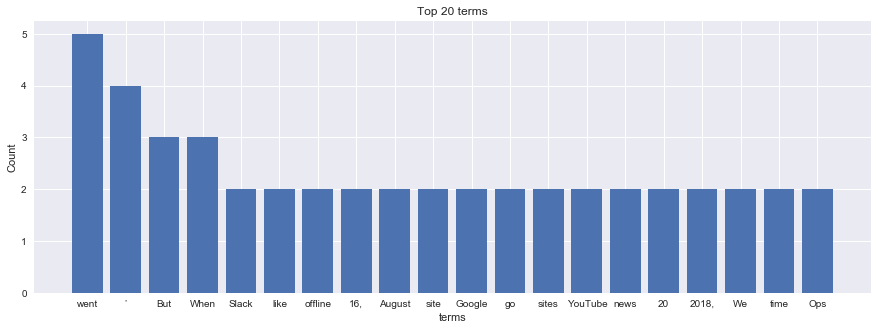

In [31]:
# Plot top 20 hashtags  - since this twitter account only has a fre tweets I just used the list from further up

count_all.clear()

for tweet in data:
    terms_minus_stop = [term for term in preprocess_tweet(tweet['text']) if term not in stop]
    one_term = set(terms_minus_stop)  # A set creates an unordered collection of UNIQUE items
    count_all.update(one_term)
    
terms_single = set(terms_all)
top20 = count_all.most_common(20)

from pylab import rcParams
rcParams['figure.figsize'] = 15,5
plt.bar(range(len(top20)), [val[1] for val in top20], align='center')
plt.xticks(range(len(top20)), [val[0] for val in top20])
plt.title('Top 20 terms')
plt.xlabel('terms')
plt.ylabel('Count')
plt.show()


### Calculate Bi-gram Frequencies 

While the frequent terms post cleaning, stop removal etc. represent a clear topic, simple term frequencies don’t give us a deeper explanation of what the text is about. To put things in context, let’s consider sequences of two terms combined (a.k.a. bigrams).

> **A bigram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. A bigram is an n-gram for n=2. The frequency distribution of every bigram in a string is commonly used for simple statistical analysis of text in many applications, including in computational linguistics, cryptography, speech recognition, and so on.**(wiki)

We can import bigrams function from nltk library to automatically create bigrams from a given sequence of text. Here is a quick demo:

In [32]:
from nltk import bigrams 

text = 'This is a very simple sentence'
terms = [term for term in preprocess_tweet(text)]
terms_bigram = bigrams(terms)
list(terms_bigram)


[('This', 'is'),
 ('is', 'a'),
 ('a', 'very'),
 ('very', 'simple'),
 ('simple', 'sentence')]

The combination of two words may help get the deeper understanding of the tweet. You could also calculate trigrams or even higher , but it might get computationally expensive. 

You are required to calculate the frequencies of bigrams in the collected tweets, and find the most frequent combination of two adjacent elements. Perform following tasks:

* Clear the counter 
* Collect all the terms excluding stop words, hashtags and mentions
* Calculte the bigrams for each tweet and update counter with frequencies
* Display and top 20 bigrams

In [33]:
# Show the frequency of top 20 bigrams in the corpus

count_all.clear()

for tweet in data:
    cleaned_terms = [term for term in preprocess_tweet(tweet['text']) 
                        if term not in stop and not term.startswith(('#', '@'))]
    terms_bigrams = bigrams(cleaned_terms)
    count_all.update(list(terms_bigrams))
    
pprint(count_all.most_common(20))


# [(('Vote', 'Vote'), 33), (('Data', 'Science'), 11), (('San', 'Francisco'), 7), 
# (('West', '2018'), 7), (('Oct', '31'), 5), (('31', 'Nov'), 5), (('Nov', '3'), 5), 
# (('Don', '’'), 4), (('Francisco', 'Oct'), 4), (('Big', 'Data'), 4), (('machine', 'learning'), 3), 
# (('data', 'scientists'), 3), (('data', 'science'), 3), (('Machine', 'Learning'), 3), 
# (('Deep', 'Learning'), 3), (('Data', 'Scientist'), 3), (('LIVESTREAM', 'Pass'), 3), 
# (('I', '’'), 3), (('\u2066', '\u2069'), 3), (('Cheat', 'Sheet'), 2)]

[(('went', 'offline'), 2),
 (('YouTube', 'went'), 2),
 (('AM', '01'), 2),
 (('Alpine', 'Meadows'), 2),
 (('When', 'Slack'), 1),
 (('Slack', 'goes'), 1),
 (('goes', 'hear'), 1),
 (('hear', 'A'), 1),
 (('A', 'LOT'), 1),
 (('LOT', 'But'), 1),
 (('But', '’'), 1),
 (('’', 'less'), 1),
 (('less', 'frequent'), 1),
 (('frequent', 'think'), 1),
 (('think', 'These'), 1),
 (('These', 'platforms'), 1),
 (('platforms', 'https://t.co/uCq8ZqYcsl'), 1),
 (('There', '’'), 1),
 (('’', 'nothing'), 1),
 (('nothing', 'like'), 1)]


So we start to see something a bit more meaningful. For this case, we see more meaningul combinations of words which clearly indicate themes or recurring topics within tweets. A bit more effort can really get us results that can be easily analyzed to get some real insights. 

## Collecting Tweets From A User's Timeline - `user_timeline()` method


For some analyses, you may be interested in collecting tweets from someone else's timeline. We can use `user_timeline()` method to achieve this while passing `id=name` parameter to identify the user. Let's collect last 100 tweets from "FlatironSchool" and visualize top 10 hashtags and mentions. Apart from the new method `user_timeline()`, everything else will remain the same as above. Perform following tasks:

* Collect last 200 tweets from "FlatironSchool"
* Calculate top 10 hashtags and mentions as terms from collected tweets
* Visualize results as bargraphs in both cases

In [40]:
# Calculate and Visulize top 10 hashtags in last 200 tweets from FlatironSchool's Timeline

count_all.clear()

account = 'FlatironSchool'
count_to_get = 200

results = my_first_api.user_timeline(id=account, count=count_to_get)


In [42]:
for tweet in results:
    hashtags = [term for term in preprocess_tweet(tweet.text) if term.startswith('#')]
    count_all.update(hashtags)
    
pprint(count_all.most_common(10))

[('#100DaysOfCode', 12),
 ('#changethings', 8),
 ('#ChangeThings', 3),
 ('#100daysofcode', 3),
 ('#flatironschool', 2),
 ('#', 2),
 ('#ruby', 2),
 ('#code', 2),
 ('#wearewework', 2),
 ('#flatironatlanta', 2)]


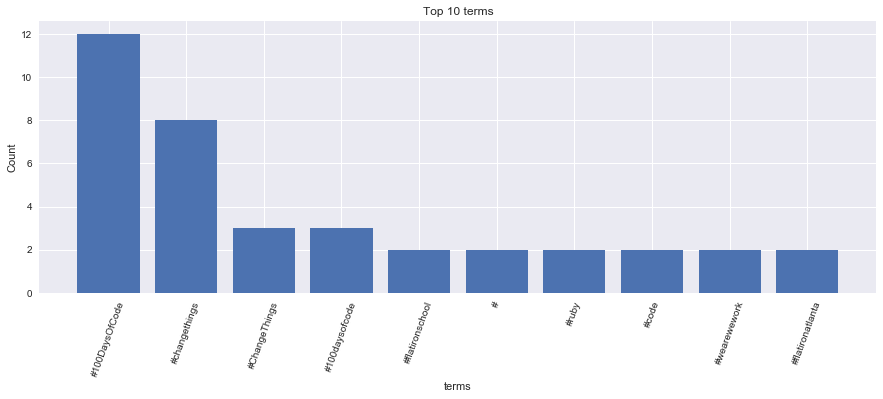

In [46]:
top10 = count_all.most_common(10)
plt.bar(range(len(top10)), [val[1] for val in top10], align='center')
plt.xticks(range(len(top10)), [val[0] for val in top10])
plt.xticks(rotation=70)
plt.title('Top 10 terms')
plt.xlabel('terms')
plt.ylabel('Count')
plt.show()

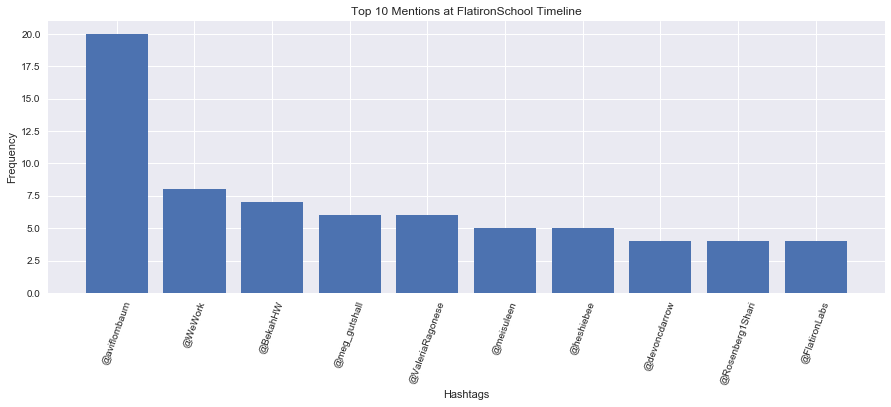

In [47]:
# Calculate and Visulize top 10 mentions in last 200 tweets from FlatironSchool's Timeline 
# Exclude @FlatironSchool mentions 

count_all.clear()

for tweet in results:
    terms_hash = [term for term in preprocess_tweet(tweet.text)
                   if(term.startswith('@') and term != '@FlatironSchool')]
    count_all.update(terms_hash)
    
top10 = count_all.most_common(10)

plt.bar(range(len(top10)), [val[1] for val in top10], align='center')
plt.xticks(range(len(top10)), [val[0] for val in top10])
plt.xticks(rotation=70)
plt.title('Top 10 Mentions at FlatironSchool Timeline')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()


## Collecting Tweets Using a Keyword -  `.search()` method

Let’s look at one last use case i.e. getting the most recent tweets that contain a specific keyword. This can be extremely useful if you want to monitor specifically mentioned topics in the Twitter world, or even to see how your business is getting mentioned. We shall use Twitter standard serach API whith `q=query` parameter to pass our search query.  

Let’s say we want to see how FlatironSchool is being been mentioned on Twitter. We would like to see which Twitter  users are being mentioned in conjunction with FlatironSchool. Remember maxiumum number of tweets you can mine is 180 per 15 minutes window. 

Perform following tasks
* Clear the counter
* Collect 200 tweets that mention Flatiron School using `.search()` method. (Use `language=en` to collect english tweets only)
* Collect the top 30 @mentions from the all tweets that mention FlatironSchool.
* Visualize the results as a wordcloud

In [48]:
# The search term you want to find
query = "FlatironSchool"
# Language code (follows ISO 639-1 standards)
language = "en"
tweetCount = 200

results = my_first_api.search(q=query, lang=language, tweet_mode='extended', count=tweetCount)

count_all.clear()

for tweet in results:
    terms_hash = [term for term in preprocess_tweet(tweet.full_text) if term.startswith('@')]
    count_all.update(terms_hash)

top30 = count_all.most_common(30)
pprint(top30)


# [('@FlatironSchool', 83), ('@fulmolightning', 52), ('@pierre_rochard', 21), 
# ('@peterktodd', 19), ('@MsJisola', 17), ('@ElectrumWallet', 17), ('@BtcpayServer', 14), 
# ('@r0ckstardev', 13), ('@Blockstream', 12), ('@Excellion', 12), ('@rootzoll', 11), 
# ('@CryptoCloaks', 8), ('@CasaHODL', 7), ('@overtorment', 6), ('@CReckhow', 5), 
# ('@starkness', 4), ('@CodeNewbies', 4), ('@TeachFirst', 4), ('@jeetsidhu_', 3), ('@Snyke', 3)]

[('@FlatironSchool', 66),
 ('@RuthaNuguse', 19),
 ('@ChickTechSea', 15),
 ('@Microsoft', 13),
 ('@meg_gutshall', 9),
 ('@pmknyc', 9),
 ('@guysbryant', 7),
 ('@keilonimitchell', 7),
 ('@RanaAElgendy', 7),
 ('@Cheritathetruth', 7),
 ('@Fla', 6),
 ('@GraceMacjones', 6),
 ('@shanselman', 5),
 ('@Saturn226', 4),
 ('@artismarti', 4),
 ('@TunKhine5', 4),
 ('@adymitruk', 4),
 ('@flatironschool', 3),
 ('@L_corr', 3),
 ('@inBituinEDU', 2),
 ('@devoncdarrow', 2),
 ('@vcdooley', 2),
 ('@heshiebee', 2),
 ('@ValeriaRagonese', 2),
 ('@FwdSlashKrystle', 2),
 ('@github', 2),
 ('@_srieger', 2),
 ('@roniece_dev', 1),
 ('@LoyaltyForLove', 1),
 ('@meisuleen', 1)]


Another common way to view dominant terms in a corpus of text is to visualize a wordcloud of top n terms. Here is an API reference for [WordCloud for Python](https://amueller.github.io/word_cloud/references.html). 
* Create a word cloud from top 20 mentions above to highlight who is being mentioned most. 

In [51]:
# Visualize the word cloud for top 20 mentions everytime flatiron school gets mentioned in a tweet

!pip install Pillow

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [56]:
# !pip install Pillow
# !pip install wordcloud

from PIL import Image
import numpy as np
from os import path
import wordcloud

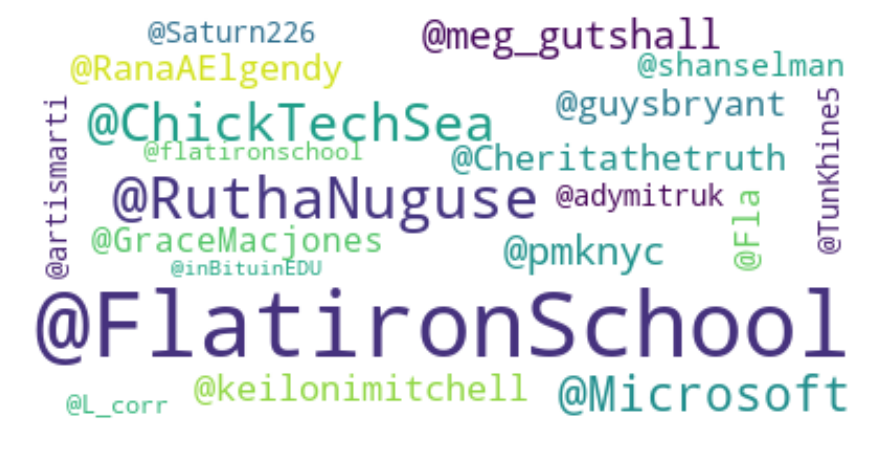

In [59]:
# solution version

top20 = count_all.most_common(20)

mask = np.array(Image.open("FS.png"))
cloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white")

cloud.generate_from_frequencies(dict(top20))

plt.figure(figsize=(15,10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

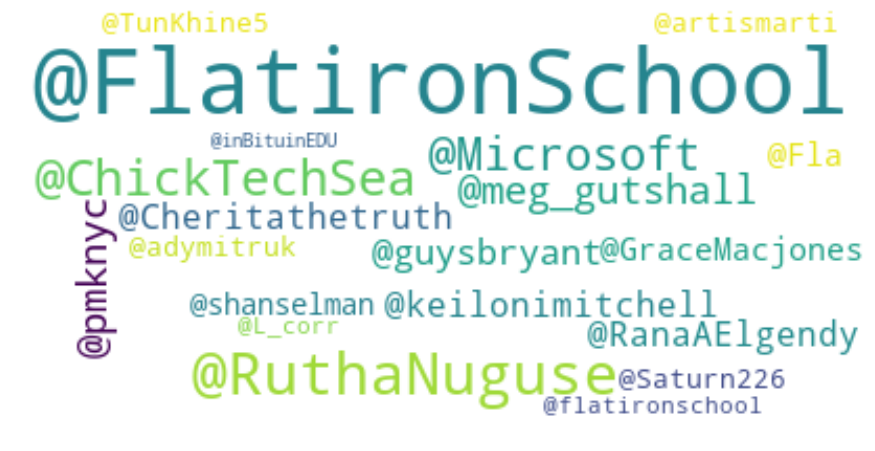

In [60]:
top10 = count_all.most_common(20)

mask = np.array(Image.open("FS.png"))
cloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white")

cloud.generate_from_frequencies(dict(top10))

plt.figure(figsize=(15,10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This looks great. Try collecting a large number of tweets using the cfietria seen previously and create a more populated word cloud. You can also customize and prettify it to your heart's content. 

## From JSON to DataFrames

So far, we have been processing our tweets directly from the JSON files. It may be desired for an advanced analystical experiment to store data as pandas dataframe and enjoy all the goodness of pandas, scikitlearn and built in statistics. Let's try to select some selected parts of the tweet and save it nicely as pandas dataframe and csv file. 

#### Load `tweets.json`  and save following contents as pandas dataframe `tweet_json_df`
    * id
    * full_text
    * favorite_count
    * retweet_count
    * created_at

* Set some meaningful names for dataframe columns to store these values.
* Print the dataframe head to inspect the contents
* save data as "tweets.csv"

In [66]:
# Parse the JSON file, selecting above attributes for each tweet and saving as a new row in a pandas dataframe

tweets_list = []
with open('tweets.json', encoding='utf-8') as json_file:
    all_tweets = json.load(json_file)
    for tweet in all_tweets:
        tweet_id = tweet['id']
        text = tweet['text']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        created_at = tweet['created_at']
        tweets_list.append({'tweet_id': str(tweet_id),
                           'text': str(text), 
                           'favorite_count': int(favorite_count),
                           'retweet_count': int(retweet_count),
                           'created_at': created_at})
        tweet_json_df = pd.DataFrame(tweets_list, 
                                    columns = ['tweet_id', 'text', 
                                   'favorite_count', 
                                   'retweet_count', 
                                   'created_at'])
tweet_json_df.to_csv('tweets.csv')
tweet_json_df.head()

# tweet_id	             text	                                         favorite_count	retweet_count	created_at
# 0	1056647627062661121	RT @RalstonReports: The turnout models are loo...	0	15	Sun Oct 28 20:43:20 +0000 2018
# 1	1056647041093373952	[Cheat Sheet] Python Basics For Data Science h...	2	1	Sun Oct 28 20:41:00 +0000 2018
# 2	1056640802401615872	RT @Popehat: NYT: Well, Okay, But Are People ...	0	620	Sun Oct 28 20:16:13 +0000 2018
# 3	1056639940438544384	https://t.co/txeJ3g9IMW	1	1	Sun Oct 28 20:12:47 +0000 2018
# 4	1056638994203729922	IBM and NVIDIA collaborate to expand machine l...	3	1	Sun Oct 28 20:09:02 +0000 2018

,tweet_id,text,favorite_count,retweet_count,created_at
0,1081980892099170304,"When Slack goes down, you hear about it A LOT....",12,1,Sun Jan 06 18:28:41 +0000 2019
1,1081980889574236161,There’s nothing like a Slack outage to shake u...,15,0,Sun Jan 06 18:28:40 +0000 2019
2,1081980886969507842,"Google and its sister services, like Google Do...",4,1,Sun Jan 06 18:28:40 +0000 2019
3,1081980884457218048,Porhub also reaped the rewards of a server iss...,3,1,Sun Jan 06 18:28:39 +0000 2019
4,1081980883102445568,News sites aren’t the only ones who benefited ...,3,2,Sun Jan 06 18:28:39 +0000 2019


So there we have it. The skills that you have learned in this lab can be used towards data journalism, data science related articles etc. These skills will also come in handy for more advanced NLP techniques like topic modelling, sentiment analysis, emoticon analysis etc. 

## Level Up - Optional 

* Try generating more wordclouds from all the examples we saw in this lab. 
* Ask yourself an analytical question and mine Twitter to get tweets, process them in tweepy and visualize the results. 
* Count emoticons for smily face, frowning face, excited face etc. and see what are people's sentiments about a specific topic of interest i.e. Brexit, War in Syria, Best actor from last Oscars etc. 
* See which Twitter member is mentioning you the most at Twitter.
* ON-going : Repeatedly mine twitter (say once per day) on a topic of interest and collect,parse,visualize tweets to see any changing trends. 

## Further Reading 

* [Introduction to NLP](https://blog.algorithmia.com/introduction-natural-language-processing-nlp/)
* [Python/NLTK Language Processing](http://blog.chapagain.com.np/python-nltk-twitter-sentiment-analysis-natural-language-processing-nlp/)
* [Applying NLP to Twitter in Python](https://dzone.com/articles/applying-nlp-to-tweets-with-python)
* [Using the Twitter API and NLP to analyze the tweets of different users.](https://towardsdatascience.com/twitter-api-and-nlp-7a386758eb31)

## Summary 

In this lab, we saw how to collect data from twitter using OAuth and collect Tweets under for a number of different use cases. We looked at parsing the JSON file for collecting relevant information and also visualized the outcome of our processing. As a reminder, this lab is supposed to be a data engineering oriented lab, i.e. getting data ready for processing. We shall see more on NLP later in next module of the course. This lab should get you all ready for some serious experiments like sentiment analysis , predictions and classification tasks. 